<a href="https://colab.research.google.com/github/YonggunJung/ICT_TensorFlow/blob/main/20231013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# MNIST데이터를 이용해서 Functional API를 이용한 Model 만들어 사용

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ICT Innovation Square/data/mnist_train.csv')
display(df)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# 데이터 정규화 및 train, test 분할
# Data Split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label', axis=1, inplace=False),
                 df['label'],
                 test_size=0.3,
                 random_state=0)
# test_size : test set의 비율 (0.3 => 30%)
# random_state : split할 때 랜덤하게 split하게 되는데 이를 일정하게 고정(seed의 개념)

# Min-Max Normalization
scaler = MinMaxScaler()   # scaler = StandardScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 784)]             0         
                                                                 
 FlattenLayer (Flatten)      (None, 784)               0         
                                                                 
 Hidden_1 (Dense)            (None, 256)               200960    
                                                                 
 Hidden_2 (Dense)            (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


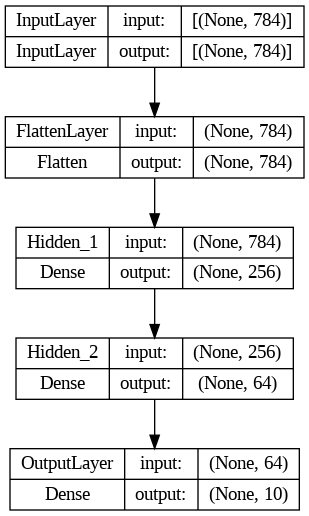

In [5]:
# Model 만들기
# Functional API를 이용한 Model구현
# Layer를 함수 인자 처럼 사용

# Input Layer부터 정의 해야 함
input_layer = Input(shape = (784,),
                    name = 'InputLayer')

x1 = Flatten(name = 'FlattenLayer')(input_layer)
x2 = Dense(units = 256,
           activation = 'relu',
           name = 'Hidden_1')(x1)
x3 = Dense(units = 64,
           activation = 'relu',
           name = 'Hidden_2')(x2)

output_layer = Dense(units = 10,
               activation = 'softmax',
               name = 'OutputLayer')(x3)

# Model 생성
model = Model(inputs = input_layer,
              outputs = output_layer)

model.summary()

plot_model(model,
           show_shapes=True,
           show_layer_names=True,
           to_file='my_model.png')

In [6]:
# DCGAN 구현
# MNIST데이터셋 이용
# MNIST Dataset은 Kaggel에서도 얻을수 있지만 Tensorflow Keras에서도 얻을 수 있음
# 형태는 약간 다름

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, Conv2D, Activation, LeakyReLU, BatchNormalization, UpSampling2D, Reshape


In [7]:
# 생성자 모델 만들기
# 생성자 모델은 Sequential 모델로 만듦
generator = Sequential()

# 첫번째 layer는 Dense layer가 나옴
# units의 갯수는 128*7*7로 설정. 128은 변경 가능, 7*7은 이유가 있음
generator.add(Dense(units = 128*7*7,
                    input_shape = (100, ),
                    activation = LeakyReLU(0.2)))

generator.add(BatchNormalization())

# 위에서 나온 데이터를 Convolution Layer에 넣어야 함
# Convolution Layer에 입력하려면 이미지가 3차원이 되어야 함
generator.add(Reshape((7, 7, 128)))

# UpSampling2D를 이용해서 이미지 크기 키우기
generator.add(UpSampling2D())     # 14, 14, 128

# Convolution Layer를 통과
generator.add(Conv2D(filters = 64,
                 kernel_size = 5,
                 padding = 'same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))

generator.add(UpSampling2D())     # 28, 28, 128

generator.add(Conv2D(filters = 1,
                 kernel_size = 5,
                 padding = 'same',               # 28, 28, 1
                 activation = 'tanh'))

generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              633472    
                                                                 
 batch_normalization (Batch  (None, 6272)              25088     
 Normalization)                                                  
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 64)        204864    
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 64)        2

In [8]:
# 판별자 구현
# 생성자에서 넘어온 이미지가 진짜인지 가짜인지 판별
# 이진분류 모델 사용, CNN으로 구성

discriminator = Sequential()

discriminator.add(Conv2D(filters=64,
                         kernel_size = 5,
                         strides = 2,
                         input_shape = (28, 28, 1),
                         padding = 'same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(rate = 0.3))


discriminator.add(Conv2D(filters=128,
                         kernel_size = 5,
                         strides = 2,
                         padding = 'same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(rate = 0.3))


discriminator.add(Flatten())
discriminator.add(Dense(units = 1,
                        activation = 'sigmoid'))

discriminator.trainable = False

discriminator.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy')

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        1664      
                                                                 
 activation_1 (Activation)   (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 activation_2 (Activation)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)             

In [9]:
# 이렇게 생성자와 판별자 모델을 구현
# 이 두개를 연결해서 GAN 모델을 구현

# 일단 랜덤한 100개의 데이터를 가지고 있는 벡터를 Input()함수에 넣기
ginput = Input(shape = (100, ))    # 생성자 모델 input_shape이랑 같아야함

disoutput = discriminator(generator(ginput))

gan = Model(inputs = ginput,
            outputs = disoutput)

gan.compile(optimizer = 'adam',
            loss = 'binary_crossentropy')

gan.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 28, 28, 1)         865281    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 212865    
                                                                 
Total params: 1078146 (4.11 MB)
Trainable params: 852609 (3.25 MB)
Non-trainable params: 225537 (881.00 KB)
_________________________________________________________________


In [ ]:
# 만들어진 GAN Model 학습
# 함수를 만들어서 학습 ( 길어서 함수화하는게 편함)

# epoch : 반복 학습 수
# batch_size : 한번에 몇개의 실제 이미지와 가상의 이미지를 판별자에 넣을지에 대한 갯수
# interval : GAN에 의해 생성된 이미지를 저장하는 주기
def gan_train(epoch, batch_size, interval):

  # 일단은 데이터부터 가져와야 함
  (x_data, _), (_, _) = mnist.load_data()         # _ : 필요 없어서 정의를 안하는 거임
  x_data = x_data.reshape(x_data.shape[0], 28, 28, 1).astype('float32')   # 위의 2차원 데이터를 가져 와서 3차원으로 병경

  # 정규화 해야함, 그런데 일반적인 정규화가 아니라 픽셀값 -1 ~ 1 사이의 값으로 변경
  x_data = (x_data - 127.5) / 127.5

  true = np.ones((batch_size, 1))  # 모두 참인 label
  fake = np.zeros((batch_size,1))  # 모두 거짓인 label

  for i in range(epoch):
        # 실제 데이터를 판별자에 입력하는 부분
        # np.random.randint(a,b,c)는 a부터 b까지 숫자 중 하나를
        # 랜덤하게 선택해 가져오는 과정을 c번 반복합니다.
        idx = np.random.randint(0, x_data.shape[0], batch_size)
        # 선택된 숫자에 해당하는 이미지를 가져옵니다. 실제이미지를
        # 랜덤하게 선택해서 불러옵니다.
        imgs = x_data[idx]
        # train_on_batch() 함수를 이용하여 판별을 시작합니다.
        # train_on_batch() 함수는 입력 값과 label을 받아서 딱 한번
        # 학습을 실시해 모델을 update합니다.
        d_loss_real = discriminator.train_on_batch(imgs, true)

        # 가상 이미지를 판별자에 입력하는 부분
        # 실제 이미지에 이어서 이번에는 생성자에서 만든 가상의 이미지를
        # 판별자에 넣습니다.
        # 가상의 이미지는 모두 거짓(0)이라는 label을 사용합니다.
        noise = np.random.normal(0,1,(batch_size,100))
        gen_imgs = generator.predict(noise)
        # 학습이 반복될수록 가짜라는 레이블을 붙인 이미지들에 대한
        # 예측 결과가 거짓으로 나오게 됩니다.
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

        # 실제 이미지를 넣은 d_loss_real과
        # 가상 이미지를 넣은 d_loss_fake가 판별자 안에서 번갈아 가며
        # 진위를 판단하기 시작합니다.
        # 각각 계산되는 오차의 평균을 구합니다.
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # 판별자와 생성자를 연결해서 만든 gan 모델을 이용해
        # 생성자의 오차를 구합니다.
        g_loss = gan.train_on_batch(noise, true)

        # 학습이 진행되는 동안 생성자와 판별자의 오차가 출력됩니다.
        print('epoch: {}, d_loss: {}, g_loss: {}'.format(i, d_loss, g_loss))

                # 중간 과정을 이미지로 저장하는 부분
        # 정해진 인터벌만큼 학습되면 그때 만든 이미지를 gan_images 폴더에
        # 저장하라는 의미
        if i % interval == 0:
            r, c = 5, 5

        noise = np.random.normal(0,1,(25,100))
        gen_imgs = generator.predict(noise)

        gan_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(5,5)
        count = 0
        for j in range(5):
            for k in range(5):
                axs[j,k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                axs[j,k].axis('off')
                count += 1
        fig.savefig('/content/gan_images/gan_mnist_{}.png'.format(i))



gan_train(2001, 32, 200)

1/1 [==============================] - 0s 373ms/step
epoch: 0, d_loss: 0.7223135530948639, g_loss: 0.7177032232284546
1/1 [==============================] - 0s 20ms/step
epoch: 1, d_loss: 0.7067742645740509, g_loss: 0.7194221019744873
1/1 [==============================] - 0s 16ms/step
epoch: 2, d_loss: 0.7187411785125732, g_loss: 0.7039378881454468
1/1 [==============================] - 0s 16ms/step
epoch: 3, d_loss: 0.7244892716407776, g_loss: 0.6946038007736206
1/1 [==============================] - 0s 16ms/step
epoch: 4, d_loss: 0.7207738161087036, g_loss: 0.695489764213562
1/1 [==============================] - 0s 19ms/step
epoch: 5, d_loss: 0.71798175573349, g_loss: 0.6849693655967712
1/1 [==============================] - 0s 16ms/step
epoch: 6, d_loss: 0.7258706390857697, g_loss: 0.6889466047286987
1/1 [==============================] - 0s 16ms/step
epoch: 7, d_loss: 0.7336523234844208, g_loss: 0.674611508846283
1/1 [==============================] - 0s 23ms/step
epoch: 8, d_los

<ipython-input-10-a59fdcfe92b7>:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(5,5)


1/1 [==============================] - 0s 17ms/step
epoch: 21, d_loss: 0.748089611530304, g_loss: 0.6311852931976318
1/1 [==============================] - 0s 17ms/step
epoch: 22, d_loss: 0.7440260946750641, g_loss: 0.6243829727172852
1/1 [==============================] - 0s 18ms/step
epoch: 23, d_loss: 0.753397524356842, g_loss: 0.6214993000030518
1/1 [==============================] - 0s 22ms/step
epoch: 24, d_loss: 0.746059238910675, g_loss: 0.6106648445129395
1/1 [==============================] - 0s 18ms/step
epoch: 25, d_loss: 0.7556172609329224, g_loss: 0.6189718842506409
1/1 [==============================] - 0s 16ms/step
epoch: 26, d_loss: 0.7462161779403687, g_loss: 0.60129714012146
1/1 [==============================] - 0s 16ms/step
epoch: 27, d_loss: 0.7530921101570129, g_loss: 0.6147240996360779
1/1 [==============================] - 0s 24ms/step
epoch: 28, d_loss: 0.7540618777275085, g_loss: 0.6095708608627319
1/1 [==============================] - 0s 33ms/step
epoch: 29